## 라이브러리

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import csv
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

## 작품 선택하기

In [3]:
import os
path = '../script'

# 다큐멘터리(0), 드라마(1), 영화(2) 선택
category = 2
if category == 0:
    path = path + '/Documentary'
elif category == 1:
    path = path + '/Drama'
else:
    path = path + '/Movie'

_list = os.listdir(path)
file_list = []
for file in _list:
    if file.startswith('.'): continue
    file_list.append(file)

print(len(file_list), file_list[:5])

46 ['About.Time', 'Arthur.Christmas', 'Baby.Driver', 'Baby.DriverBaby.Driver', 'Bad.Boys']


## 여기서 작품 선택합니다 꼭!!

In [4]:
# 바로 위 코드에서 file_list를 참고하여 작품 선택
title = file_list[0]

file_name = title + '.WEBRip.Netflix.en[cc]'
print(f'{path}/{title}/{file_name}')

../script/Movie/About.Time/About.Time.WEBRip.Netflix.en[cc]


## CSV 파일 읽기

In [5]:
data = pd.read_csv(f'{path}/{title}/{file_name}.csv')

In [6]:
script = data

## 데이터 정보

In [7]:
script.info()
script.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   start   3330 non-null   object
 1   end     3330 non-null   object
 2   script  3330 non-null   object
dtypes: object(3)
memory usage: 78.2+ KB


,start,end,script
0,00:00:54.291,00:00:57.208,"['I', 'always', 'knew']"
1,00:00:54.291,00:00:57.208,"['we', 'were', 'a', 'fairly', 'odd', 'family.']"
2,00:00:57.250,00:01:02.125,"['First', 'there', 'was', 'me.']"
3,00:00:57.250,00:01:02.125,"['Too', 'tall,', 'too', 'skinny,']"
4,00:00:57.250,00:01:02.125,"['too', 'orange.']"


## DataFrame to Text

In [8]:
list_script = []
list_script.extend(data for data in script['script'])
# len(list_script)
# list_script[:10]
text_script = ' '.join(list_script)
text_script[:500]

"['I', 'always', 'knew'] ['we', 'were', 'a', 'fairly', 'odd', 'family.'] ['First', 'there', 'was', 'me.'] ['Too', 'tall,', 'too', 'skinny,'] ['too', 'orange.'] ['My', 'mum', 'was', 'lovely,'] ['but', 'not', 'like', 'other', 'mums.'] ['There', 'was', 'something', 'solid', 'about'] ['her--', 'something', 'rectangular,'] ['busy', 'and', 'unsentimental.'] ['Her', 'fashion', 'icon'] ['was', 'the', 'queen.'] ['Dad--', 'Well,', 'he', 'was', 'more', 'normal.'] ['He', 'always', 'seemed', 'to', 'have'] ['t"

## 영문자 이외 문자는 공백으로 변환

In [9]:
import re

# 영문자 이외 문자는 공백으로 변환
only_english_script = re.sub('[^a-zA-Z]', ' ', text_script)
only_english_script[:500]

'  I    always    knew     we    were    a    fairly    odd    family      First    there    was    me      Too    tall     too    skinny      too    orange      My    mum    was    lovely      but    not    like    other    mums      There    was    something    solid    about     her      something    rectangular      busy    and    unsentimental      Her    fashion    icon     was    the    queen      Dad      Well     he    was    more    normal      He    always    seemed    to    have     t'

## 소문자로 변환

In [10]:
# 소문자 변환
no_capitals_script = only_english_script.lower().split()
print(len(no_capitals_script), '\n', no_capitals_script[:50])

11916 
 ['i', 'always', 'knew', 'we', 'were', 'a', 'fairly', 'odd', 'family', 'first', 'there', 'was', 'me', 'too', 'tall', 'too', 'skinny', 'too', 'orange', 'my', 'mum', 'was', 'lovely', 'but', 'not', 'like', 'other', 'mums', 'there', 'was', 'something', 'solid', 'about', 'her', 'something', 'rectangular', 'busy', 'and', 'unsentimental', 'her', 'fashion', 'icon', 'was', 'the', 'queen', 'dad', 'well', 'he', 'was', 'more']


# nltk 설치!! 만약에 설치되어 있으면 주석 처리하기!!

In [11]:
# 설치 되었으면 주석 처리하기
# !pip3 install nltk

In [12]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NSK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 불용어 제거

In [13]:
 # 불용어 제거
stops = set(stopwords.words('english'))
no_stops_script = [word for word in no_capitals_script if not word in stops]
len(no_stops_script)

5552

list -> DataFrame

In [14]:
df_script = pd.DataFrame(no_stops_script)
result_script = pd.DataFrame(df_script.value_counts())
result_script = result_script.rename_axis('Word').rename(columns={0: 'counts'})
result_script

,counts
Word,
oh,181
yeah,124
okay,107
um,81
uh,65
...,...
often,1
devil,1
developing,1


## 파일로 저장

In [15]:
result_script.to_csv(f'{path}/{title}/unique_words_{file_name}.csv', sep=',')

## 저장한 파일 확인

In [16]:
data_check = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
data_check

,Word,counts
0,oh,181
1,yeah,124
2,okay,107
3,um,81
4,uh,65
...,...,...
1529,often,1
1530,devil,1
1531,developing,1
1532,detective,1


## 정제된 대본 데이터 불러오기

In [17]:
new_data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
script_data = new_data
script_data.info()
display(script_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    1534 non-null   object
 1   counts  1534 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.1+ KB


,Word,counts
0,oh,181
1,yeah,124
2,okay,107
3,um,81
4,uh,65
...,...,...
1529,often,1
1530,devil,1
1531,developing,1
1532,detective,1


## 기준 단어 데이터 불러오기

In [18]:
path = '../'
words = pd.read_csv(f'{path}/words/word - AllLevels.csv')
words

,word,level
0,1.0,TRUE
1,1.0,zero
2,1.0,young
3,1.0,you
4,1.0,yet
...,...,...
24836,NaN,vaunted
24837,NaN,vehemence
24838,NaN,victimizer
24839,NaN,washout


## 단어 데이터에서 레벨이 없는 단어들은 999로 처리

In [19]:
words['word'] = words['word'].fillna(999).astype('int64')
words = words.rename(columns={'word':'level', 'level':'words'})
words

,level,words
0,1,TRUE
1,1,zero
2,1,young
3,1,you
4,1,yet
...,...,...
24836,999,vaunted
24837,999,vehemence
24838,999,victimizer
24839,999,washout


## 대본과 매칭되는 단어가 있다면 레벨 입력하고, 대본과 매칭되는 단어가 없다면 0 입력

In [20]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data

KeyError: 'words'

## result 데이터 프레임 생성

In [ ]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,500
0,474
999,301
2,133
3,58
4,39
5,29


In [ ]:
result['rate'] = [i / len(script_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,0,474,30.899609
1,1,500,32.594524
2,2,133,8.670143
3,3,58,3.780965
4,4,39,2.542373
5,5,29,1.890482
6,999,301,19.621904


<AxesSubplot:xlabel='level'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


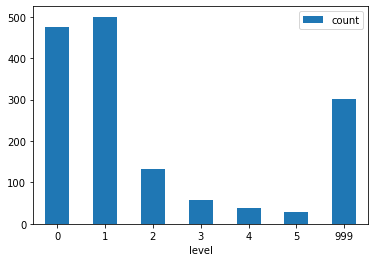

In [ ]:
result.plot(x='level', y='count', kind='bar', rot=0)

## 단어 데이터에 있다면 True, 없다면 False인 matched 컬럼

In [ ]:
matched_data['matched'] = [True if i in [1, 2, 3, 4, 5, 999] else False for i in matched_data['level']]

In [ ]:
matched_data

,words,counts,level,matched
0,oh,181,0,False
1,yeah,124,999,True
2,okay,107,999,True
3,um,81,0,False
4,uh,65,0,False
...,...,...,...,...
1529,often,1,1,True
1530,devil,1,4,True
1531,developing,1,0,False
1532,detective,1,999,True


In [ ]:
matched_data = pd.merge(script_data, words, how='left', on='words')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data = matched_data[matched_data['level'] != 0]
matched_data = matched_data[matched_data['level'] != 999]
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   1534 non-null   object 
 1   counts  1534 non-null   int64  
 2   level   1060 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.9+ KB


,words,counts,level
5,well,60,1
6,one,58,1
7,like,55,1
8,know,55,1
9,right,49,1
...,...,...,...
1525,occur,1,2
1528,office,1,1
1529,often,1,1
1530,devil,1,4


In [ ]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,500
2,133
3,58
4,39
5,29


In [ ]:
result['rate'] = [i / len(matched_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,1,500,65.876153
1,2,133,17.523057
2,3,58,7.641634
3,4,39,5.138340
4,5,29,3.820817


<AxesSubplot:xlabel='level'>

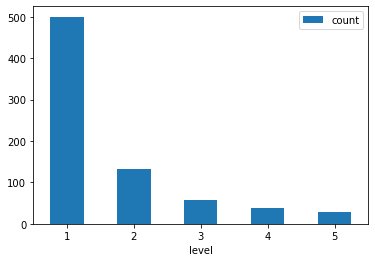

In [ ]:

result.plot(x='level', y='count', kind='bar', rot=0)